# SIMULACION DE UNA RULETA

Primero importamos las librerias que vamos a usar. Pandas para generar tablas (dataframes), numpy para hacer calculos y matplotlib para hacer graficos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

La siguiente funcion se encarga de generar un listado de tiradas (la variable x) y un listado de valores de dichas tiradas (la variable y), y luego las guarda en un dataframe de pandas.

Se utiliza la funcion ```arange(start,end,step)``` de numpy, que genera un array de numeros segun los parametros que le damos. La funcion ```random.randint(start,end,size)``` genera un listado de numeros enteros aleatorios del tamaño que le digamos y el rango de numeros que queremos que devuelva.

In [2]:
def genera_tiradas_dataframe(cantidad_tiradas):
    # generamos el numero de tiradas de acuerdo a la cantidad de tiradas que le pasamos
    x = np.arange(1,cantidad_tiradas+1)
    # generamos numeros aleatorios del 0 al 36 de acuerdo a la cantidad de tiradas que le pasamos
    y = np.random.randint(0,37,size=[cantidad_tiradas])
    # genera una lista de tuplas con los datos del numero de tirada y su valor
    tiradas_listado = list(zip(x,y))
    # generamos un dataframe de pandas, llamando a la funcion genera_tiradas
    tiradas_df = pd.DataFrame(data = tiradas_listado, columns = ['tirada','valor'])
    # retorna el dataframe creado
    return tiradas_df

La siguiente funcion se encarga de calcular las frecuencias absolutas y relativas de las tiradas.

In [3]:
def frecuencia_absoluta(tiradas_df):
    # calculamos la frecuencia absoluta de los valores obtenidos de las tiradas (cuantas veces salió tal numero)
    frecuencia_absoluta = pd.value_counts(tiradas_df['valor'])
    # ordenamos la lista de frecuencias absolutas segun el indice de la tabla para facilitar su manejo
    frecuencia_absoluta_ordenado = frecuencia_absoluta.sort_index()
    # generamos un dataframe de pandas con las frecuencias absolutas obtenidas
    frecuencias_df = pd.DataFrame(frecuencia_absoluta_ordenado)
    # le damos el nombre Frecuencia_absoluta a la unica columna que tiene el dataframe por ahora
    frecuencias_df.columns = ["Frecuencia_absoluta"]
    # calculamos las frecuencias relativas y creamos la nueva columna del dataframe
    frecuencias_df["Frecuencia_relativa_%"] = 100*frecuencias_df["Frecuencia_absoluta"]/len(tiradas_df)
    return frecuencias_df

La siguiente funcion calcula la frecuencia relativa acumulada, trabaja sobre las frecuencias que le pasamos, por lo que no retorna nada.

In [4]:
def frecuencia_relativa(frecuencias_df):
    frecuencias_relativas = frecuencias_df["Frecuencia_relativa_%"].values
    
    acum = []
    valor_acum = 0

    for frec in frecuencias_relativas:
        valor_acum += frec
        acum.append(valor_acum)

    frecuencias_df["Frecuencia_relativa_acumulada"] = acum

La siguiente funcion se encarga de generar el gráfico de barras de las frecuencias relativas de las tiradas

In [5]:
def genera_grafico(cantidad_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title("HISTOGRAMA", color="C0")
    ax.set_xlabel('Números')
    ax.set_ylabel('Frecuencia relativa')

    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')

    ax.bar(frecuencias_df.index, frecuencias_df["Frecuencia_relativa_%"])

   

    ax2 = ax.twinx()
    ax2.plot(frecuencias_df.index, frecuencias_df["Frecuencia_relativa_acumulada"], color="C1", ms=5)
    ax2.set_ylabel('Frecuencia relativa acumulada')
    ax2.yaxis.label.set_color('C1')
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    plt.savefig(f"histograma-frecuencias-relativas-{cantidad_tiradas}-tiradas.png")
    plt.show()

La siguiente funcion se encarga de generar el grafico de frecuencia relativa esperada, recibe una lista de listas que contienen los datos de cada corrida. Grafica todas las corridas en un solo grafico. 

In [6]:
def grafico_fr_esperada(fr_segun_cantidad_tiradas, cantidad_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title("FRECUENCIA RELATIVA", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('fr (frecuencia relativa)')

    for grafico in fr_segun_cantidad_tiradas:
        ax.plot(np.arange(0, cantidad_tiradas, 1), grafico, label="frn (frecuencia relativa del número X con respecto a n)")

    ax.plot(np.arange(0, cantidad_tiradas, 1), np.full(np.arange(0, cantidad_tiradas, 1).shape, 100*(1/37)), label="fre (frecuencia relativa esperada de X)", color="black")
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
    
    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')
    
    plt.legend()
    plt.savefig(f"frecuencia-relativa-esperada-{len(fr_segun_cantidad_tiradas)}-corridas.png")
    plt.show()

Lo mismo que la anterior pero para la desviacion estandar. 

In [7]:
def grafico_de_esperada(desvio_segun_cantidad_tiradas, cantidad_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title("DESVIACION ESTANDAR", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('vd (valor del desvío)')

    for grafico in desvio_segun_cantidad_tiradas:
        ax.plot(np.arange(0, cantidad_tiradas, 1), grafico, label="vd (valor del desvío del número X)")
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
    
    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')
    
    plt.legend()
    plt.savefig(f"desviacion-estandar-esperada-{len(desvio_segun_cantidad_tiradas)}-corridas.png")
    plt.show()

Lo mismo pero para la varianza. 

In [8]:
def grafico_var(varianza_segun_cantidad_tiradas, cantidad_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title("VARIANZA", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('vv (valor de la varianza)')

    for grafico in varianza_segun_cantidad_tiradas:
        ax.plot(np.arange(0, cantidad_tiradas, 1), grafico, label="vvn (valor de la varianza del número X con respecto a n)")
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
    
    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')
    
    plt.legend()
    plt.savefig(f"varianza-{len(varianza_segun_cantidad_tiradas)}-corridas.png")
    plt.show()

Lo mismo pero para la esperanza. 

In [9]:
def grafico_esperanza(esperanza_segun_cantidad_tiradas, cantidad_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_title("ESPERANZA MATEMATICA", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('vp (valor promedio de las tiradas)')
    
    for grafico in esperanza_segun_cantidad_tiradas:
        ax.plot(np.arange(0, cantidad_tiradas, 1), grafico, label="vpn (valor promedio de las tiradas con respecto a n)")
    
    ax.plot(np.arange(0, cantidad_tiradas, 1), np.full(np.arange(0, cantidad_tiradas, 1).shape, np.mean(esperanza_segun_cantidad_tiradas)), label="vpe (valor promedio esperado)", color="black")
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
    
    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')
    
    plt.legend()
    plt.savefig(f"esperanza-matematica-{len(esperanza_segun_cantidad_tiradas)}-corridas.png")
    plt.show()

La siguiente funcion calcula la varianza, desviacion estandar, frecuencia relativa y esperanza de cada corrida.
- ```np.mean()```: funcion de numpy, calcula la media (o esperanza) de una lista.
- ```np.var()```: funcion de numpy, calcula la varianza de una lista.
- ```np.std()```: funcion de numpy, calcula la desviacion estandar de una lista.

In [10]:
def estadisticas_segun_tiradas(tiradas_df):
    fr_segun_cantidad_tiradas = []
    cantidad_ocurrencias = 0
    numero = np.random.randint(0,37)  # generamos un numero aleatorio para su estudio
    esperanza_segun_cantidad_tiradas = []
    varianza_segun_cantidad_tiradas = []
    desvio_segun_cantidad_tiradas = []
    tiradas = []
    for (_, tirada) in tiradas_df.iterrows():  # recorremos el dataframe de las tiradas
        if tirada.valor == numero:  # si el valor de la tirada actual (tirada.valor) es igual al numero de estudio, aumentamos en 1 la cantidad de ocurrencias de ese numero
            cantidad_ocurrencias += 1
        fr_segun_cantidad_tiradas.append(100*cantidad_ocurrencias/tirada.tirada)   # calculamos la frecuencia relativa actual y la guardamos en una lista
        
        tiradas.append(tirada.valor)  # guardamos el valor de la tirada actual en una nueva lista
        esperanza_segun_cantidad_tiradas.append(np.mean(tiradas))   # calculamos la esperanza actual
        varianza_segun_cantidad_tiradas.append(np.var(tiradas))   # calculamos la varianza actual
        desvio_segun_cantidad_tiradas.append(np.std(tiradas))   # calculamos la desviacion estandar actual
    return fr_segun_cantidad_tiradas, esperanza_segun_cantidad_tiradas, varianza_segun_cantidad_tiradas, desvio_segun_cantidad_tiradas

Y ahora asignamos la cantidad de tiradas que queremos y corremos el codigo. La siguiente celda es solo para el histograma de frecuencias. (1 corrida)

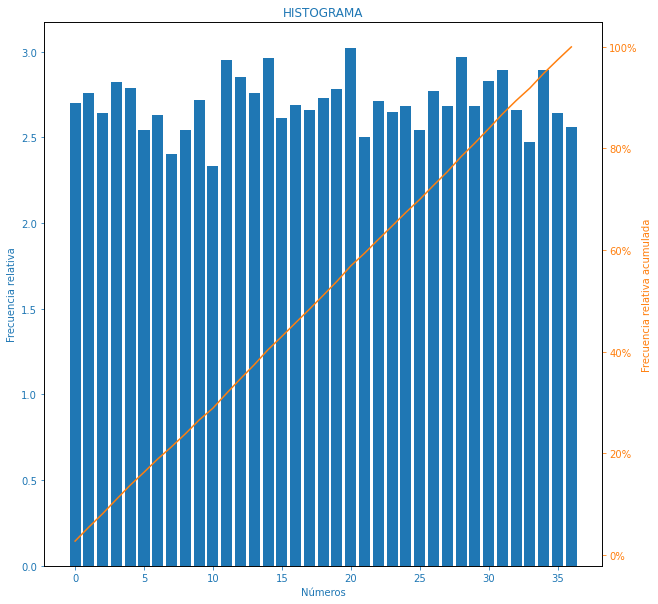

In [11]:
# asignamos la cantidad de tiradas que queremos
cantidad_tiradas = 10000

# llamamos a la funcion genera_tiradas_dataframe, le pasamos la cantidad de tiradas y nos devuelve un dataframe las tiradas
tiradas_df = genera_tiradas_dataframe(cantidad_tiradas)
# llamamos a la funcion frecuencia_absoluta, le pasamos el dataframe obtenido anteriormente y nos devuelve otro que corresponde a las frecuencias
frecuencias_df = frecuencia_absoluta(tiradas_df)
# llamamos a la funcion frecuencia_relativa, le pasamos el dataframe de las frecuencias y lo actualiza agregandole las frecuencias relativas
frecuencia_relativa(frecuencias_df)
# llamamos a la funcion genera_grafico, que genera el grafico xd
genera_grafico(cantidad_tiradas)

En la siguiente celda se ejecuta el código para la cantidad de corridas que queremos.

In [12]:
# asignamos la cantidad de tiradas que queremos
cantidad_tiradas = 10000
cantidad_corridas = 10

fr_graficos = []
esperanza_graficos = []
varianza_graficos = []
de_graficos = []

contador = 0

for corrida in range(cantidad_corridas):
    contador+=1
    print(f"CORRIDA NÚMERO {contador}")
    # llamamos a la funcion genera_tiradas_dataframe, le pasamos la cantidad de tiradas y nos devuelve un dataframe las tiradas
    tiradas_df = genera_tiradas_dataframe(cantidad_tiradas)

    # llamamos a la funcion estadisticas_segun_tiradas, pasamos el dataframe de las tiradas y nos devuelve las listas de las frecuencias relativas, varianza, esperanza, desviacion estandar segun la cantidad de tiradas
    fr_segun_tiradas, esperanza_segun_tiradas, varianza_segun_tiradas, de_segun_tiradas = estadisticas_segun_tiradas(tiradas_df)
    
    fr_graficos.append(fr_segun_tiradas)
    esperanza_graficos.append(esperanza_segun_tiradas)
    varianza_graficos.append(varianza_segun_tiradas)
    de_graficos.append(de_segun_tiradas)
    
    # printeamos los datos de cada corrida
    print(f"Esperanza : {np.mean(tiradas_df['valor'])}")
    print(f"Varianza : {np.var(tiradas_df['valor'])}")
    print(f"Desviacion estandar : {np.std(tiradas_df['valor'])}")
    print("-------------------------------------------------")


CORRIDA NÚMERO 1
Esperanza : 18.1581
Varianza : 115.84450439000014
Desviacion estandar : 10.763108491044775
-------------------------------------------------
CORRIDA NÚMERO 2
Esperanza : 18.1894
Varianza : 113.3503276400001
Desviacion estandar : 10.646611087101853
-------------------------------------------------
CORRIDA NÚMERO 3
Esperanza : 18.0161
Varianza : 114.64024078999886
Desviacion estandar : 10.70701829595891
-------------------------------------------------
CORRIDA NÚMERO 4
Esperanza : 18.035
Varianza : 115.125975
Desviacion estandar : 10.729677301764484
-------------------------------------------------
CORRIDA NÚMERO 5
Esperanza : 18.0118
Varianza : 113.39046075999958
Desviacion estandar : 10.648495704088893
-------------------------------------------------
CORRIDA NÚMERO 6
Esperanza : 17.8607
Varianza : 114.81689551000632
Desviacion estandar : 10.71526460289275
-------------------------------------------------
CORRIDA NÚMERO 7
Esperanza : 18.1136
Varianza : 113.556495039999

Ahora graficamos lo obtenido:

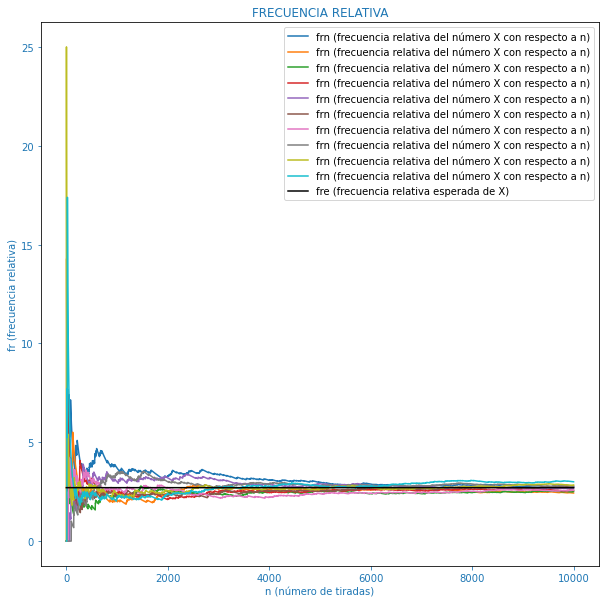

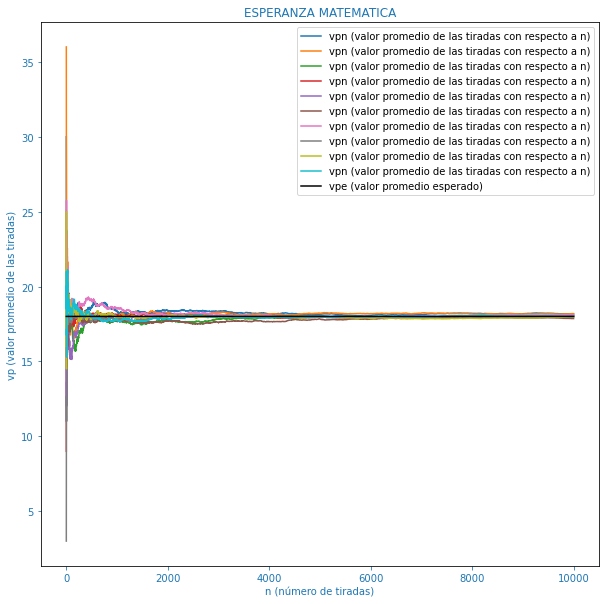

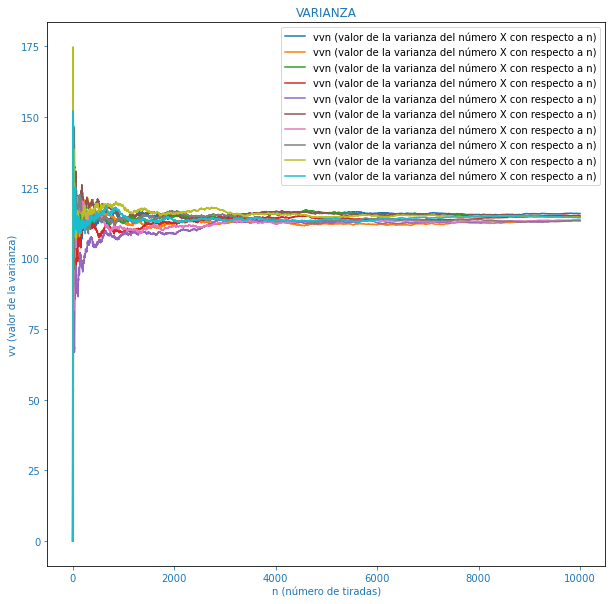

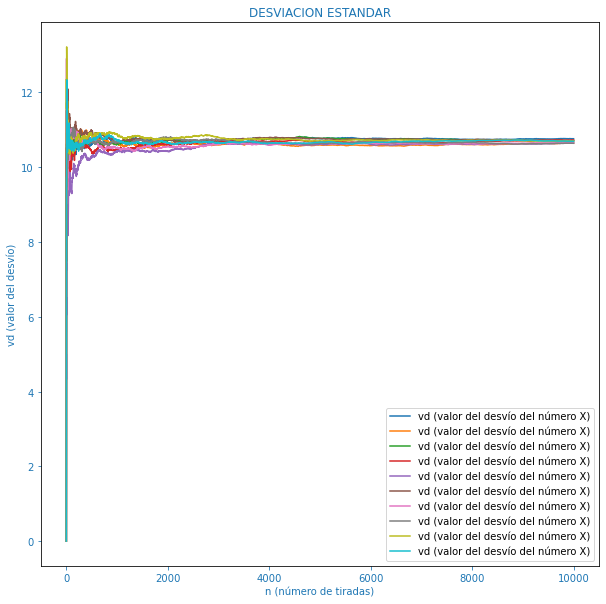

In [13]:
# llamamos a la funcion grafico_fr_esperada, que genera el grafico de las frecuencias relativas
grafico_fr_esperada(fr_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_esperanza, que genera el grafico de las esperanzas matematicas
grafico_esperanza(esperanza_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_var, que genera el grafico de las varianzas
grafico_var(varianza_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_de_esperada, que genera el grafico de las desviaciones estandar
grafico_de_esperada(de_graficos, cantidad_tiradas)

## LO MISMO QUE LO ANTERIOR PERO PARA 1 CORRIDA

In [14]:
# asignamos la cantidad de tiradas que queremos
cantidad_tiradas = 10000

fr_graficos = []
esperanza_graficos = []
varianza_graficos = []
de_graficos = []

    
# llamamos a la funcion genera_tiradas_dataframe, le pasamos la cantidad de tiradas y nos devuelve un dataframe las tiradas
tiradas_df = genera_tiradas_dataframe(cantidad_tiradas)

# llamamos a la funcion estadisticas_segun_tiradas, pasamos el dataframe de las tiradas y nos devuelve las listas de las frecuencias relativas, varianza, esperanza, desviacion estandar segun la cantidad de tiradas
fr_segun_tiradas, esperanza_segun_tiradas, varianza_segun_tiradas, de_segun_tiradas = estadisticas_segun_tiradas(tiradas_df)

fr_graficos.append(fr_segun_tiradas)
esperanza_graficos.append(esperanza_segun_tiradas)
varianza_graficos.append(varianza_segun_tiradas)
de_graficos.append(de_segun_tiradas)

# printeamos los datos de cada corrida
print(f"Esperanza : {np.mean(tiradas_df['valor'])}")
print(f"Varianza : {np.var(tiradas_df['valor'])}")
print(f"Desviacion estandar : {np.std(tiradas_df['valor'])}")
print("-------------------------------------------------")

Esperanza : 17.9626
Varianza : 114.51140124000067
Desviacion estandar : 10.701000011213937
-------------------------------------------------


Ahora graficamos lo obtenido:

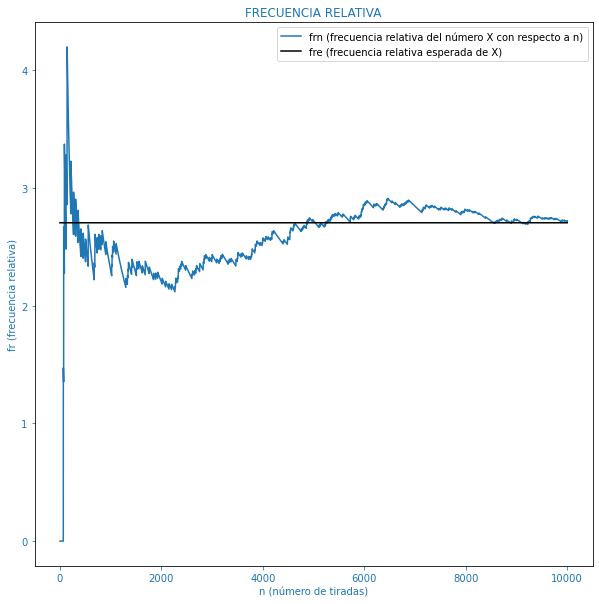

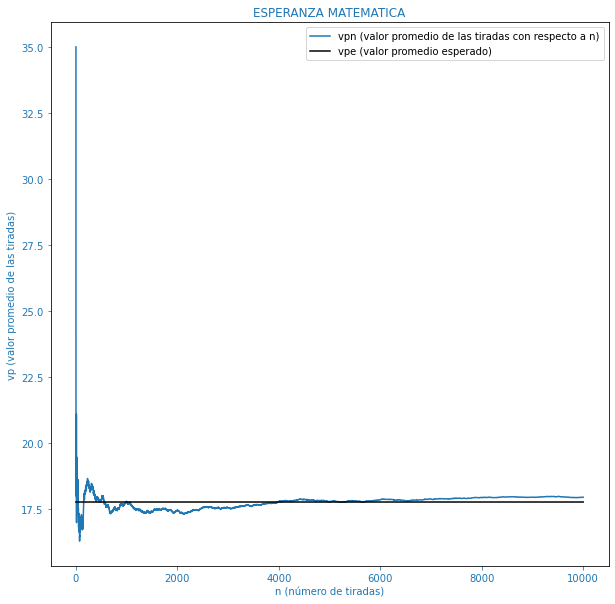

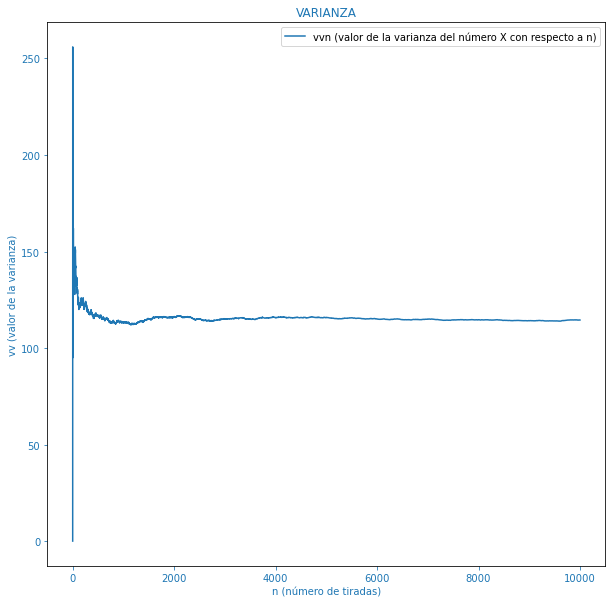

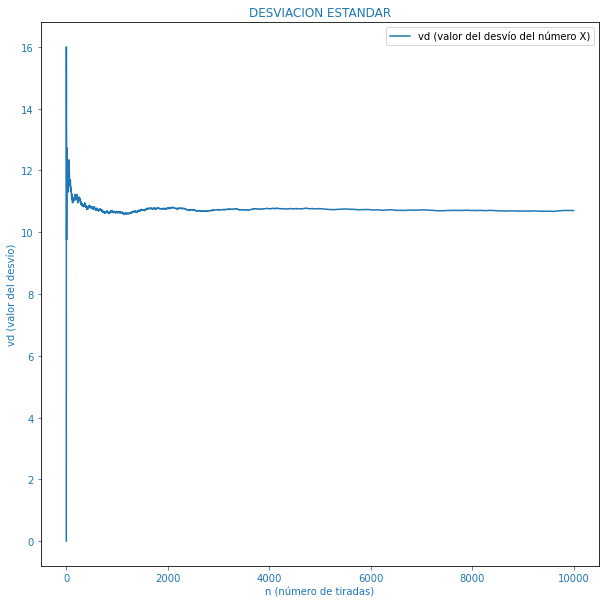

In [15]:
# llamamos a la funcion grafico_fr_esperada, que genera el grafico de las frecuencias relativas
grafico_fr_esperada(fr_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_esperanza, que genera el grafico de las esperanzas matematicas
grafico_esperanza(esperanza_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_var, que genera el grafico de las varianzas
grafico_var(varianza_graficos, cantidad_tiradas)
# llamamos a la funcion grafico_de_esperada, que genera el grafico de las desviaciones estandar
grafico_de_esperada(de_graficos, cantidad_tiradas)

## NOTA: falta saber la varianza esperada y la desviacion estandar esperada. Estas dos últimas no sé como se calculan.

## A CONTINUACION SE MUESTAN LOS DATOS PARA VER QUE ONDA

In [16]:
tiradas_df

,tirada,valor
0,1,35
1,2,3
2,3,26
3,4,20
4,5,20
...,...,...
9995,9996,8
9996,9997,32
9997,9998,3
9998,9999,15


In [17]:
frecuencias_df

,Frecuencia_absoluta,Frecuencia_relativa_%,Frecuencia_relativa_acumulada
0,270,2.70,2.70
1,276,2.76,5.46
2,264,2.64,8.10
3,282,2.82,10.92
4,279,2.79,13.71
5,254,2.54,16.25
6,263,2.63,18.88
7,240,2.40,21.28
8,254,2.54,23.82
9,272,2.72,26.54
